# CNN to classify Cifar-10 dataset (Images)



So far, we saw how to build a Dense Neural Network (DNN) that classified images of digits (MNIST) or even fashion images (Fashion-MNIST). Here we will instead, recognize the 10 classes of CIFAR ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship' and 'truck'). There are some key differences between these two image datasets that we need to take into account.

First, while MNIST were 28x28 monochrome images (1 color channel), CIFAR is 32x32 color images (3 color channels).

Second, MNIST images are simple, containing just the object centered in the image, with no background. Conversely, CIFAR ones are not centered and can have the object with a background, such as airplanes that might have a cloudy sky behind them! Those differences are the main reason to use a CNN instead of a DNN.

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

## Import and Inspect Dataset

Cifar-10 repository: https://www.cs.toronto.edu/~kriz/cifar.html





In [2]:
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


- The image data shape is: `(#images, img_heigth, img_width, #channels)`, where channels are in RGB format (red, green, blue).
- The labels shape is `(#images, label)`, where label goes from 0 to 9.


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
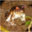

In [4]:
train_images[0]

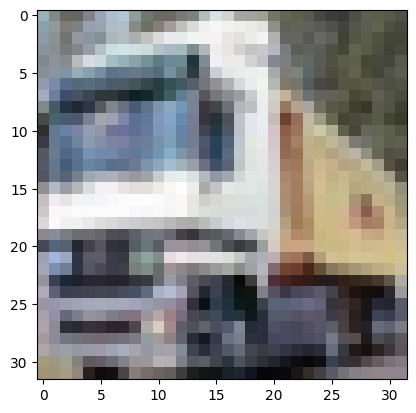

In [5]:
plt.imshow(train_images[1]);

In [6]:
train_labels[1][0]

9

    The CIFAR labels happen to be arrays, which is why you need the extra index

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
class_names[9] # The List's index is the label

'truck'

In [9]:
idx = train_labels[1][0]
class_names[idx]

'truck'

	 truck


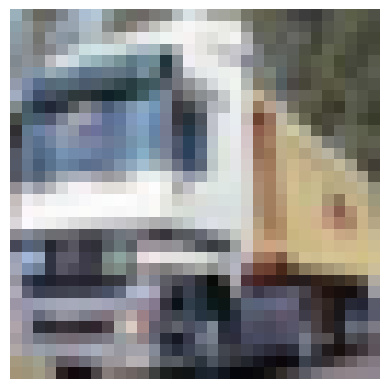

In [10]:
print("\t", class_names[train_labels[1][0]])
plt.imshow(train_images[1])
plt.axis('off');

In [11]:
 def plot_train_img(img, size=2):
    label = train_labels[img][0]
    plt.figure(figsize=(size,size))
    print("Label {} - {}".format(label, class_names[label]))
    plt.imshow(train_images[img])
    plt.axis('off')
    plt.show()

Label 9 - truck


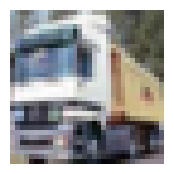

In [12]:
plot_train_img(1)

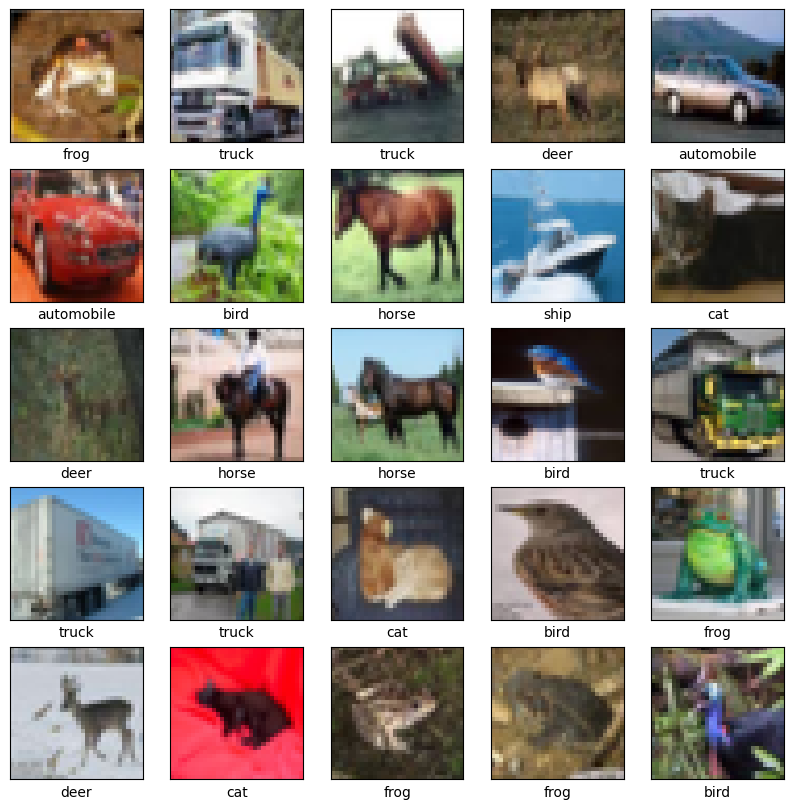

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Note that images are in color, not centered and with different backgrounds

## Preprocessing dataset

In [14]:
test_images.max()

255

In [15]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [16]:
test_images.max()

1.0

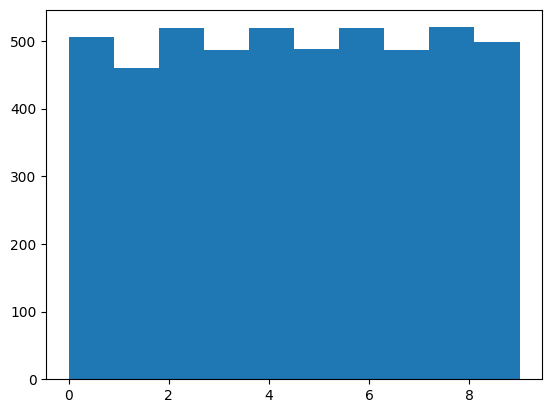

In [17]:
plt.hist(train_labels[:5_000]);

In [18]:
val_images = train_images[:5_000]
val_labels = train_labels[:5_000]
print(val_images.shape, val_labels.shape)

(5000, 32, 32, 3) (5000, 1)


In [19]:
train_images = train_images[5_000:]
train_labels = train_labels[5_000:]
print(train_images.shape, train_labels.shape)

(45000, 32, 32, 3) (45000, 1)


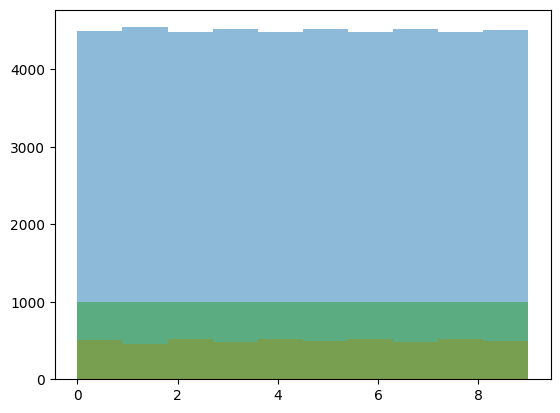

In [20]:
plt.hist(train_labels, alpha=0.5)
plt.hist(val_labels, alpha=0.5)
plt.hist(test_labels, alpha=0.5);

## Create Model Arquitecture and Compile

On [Convolution layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D),
- strides is an integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Default (1,1).
- padding: one of "valid" or "same" (case-insensitive). Default = 'valid'.
  - "valid" means no padding.  
  - "same" results in padding with zeros evenly
to the left/right or up/down of the input such that output has the same


In [21]:
model = Sequential()


model.add(Conv2D(
    filters=32,
    kernel_size=(3,3),
    activation='relu',
    input_shape=(32, 32, 3))
)
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'

# Compile the model
model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=['accuracy'])

## Training

In [23]:
NUM_EPOCHS = 20

early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [24]:
# Fit the model
history = model.fit(train_images,
                    train_labels,
                    epochs=NUM_EPOCHS,
                    validation_data=(val_images, val_labels),
                    callbacks=[early_stop]
)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3780 - loss: 1.7145 - val_accuracy: 0.5686 - val_loss: 1.2569
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5850 - loss: 1.1719 - val_accuracy: 0.6288 - val_loss: 1.0543
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6485 - loss: 1.0030 - val_accuracy: 0.6684 - val_loss: 0.9566
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6903 - loss: 0.9019 - val_accuracy: 0.6662 - val_loss: 0.9763
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7133 - loss: 0.8324 - val_accuracy: 0.6844 - val_loss: 0.9452
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7311 - loss: 0.7657 - val_accuracy: 0.6866 - val_loss: 0.9069
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7529 - loss: 0.7093 - val_accuracy: 0.6844 - val_loss: 0.9235
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7704 - loss: 0.6581 -

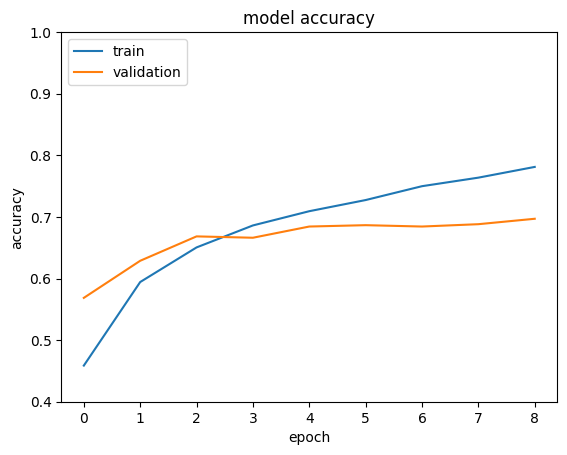

In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

## Evaluate Model

In [26]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7050 - loss: 0.9186


[0.9288105368614197, 0.7017999887466431]

**Accuracy**
- Train: 85% - 90%;
- Validation: 68%-70%
- Test: 66%-68%

In [27]:
predictions = np.argmax(model.predict(test_images), axis=-1)
predictions.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000,)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(test_labels, predictions, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.67      0.81      0.73      1000
  automobile       0.79      0.82      0.81      1000
        bird       0.67      0.56      0.61      1000
         cat       0.54      0.45      0.49      1000
        deer       0.66      0.63      0.64      1000
         dog       0.63      0.59      0.61      1000
        frog       0.75      0.78      0.77      1000
       horse       0.75      0.77      0.76      1000
        ship       0.76      0.82      0.79      1000
       truck       0.75      0.78      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [30]:
confusion_matrix(test_labels,predictions)

array([[806,  20,  23,  10,  15,   4,   8,   6,  73,  35],
       [ 30, 824,   5,   9,   5,   2,   7,   3,  30,  85],
       [ 99,  14, 561,  53,  83,  60,  49,  46,  22,  13],
       [ 42,  23,  63, 445,  79, 161,  84,  41,  22,  40],
       [ 37,   7,  55,  69, 628,  39,  47,  78,  25,  15],
       [ 26,   8,  47, 152,  41, 595,  36,  63,  16,  16],
       [ 16,  10,  38,  50,  47,  28, 781,   5,  13,  12],
       [ 32,  11,  30,  21,  43,  44,   9, 772,  14,  24],
       [ 75,  46,   5,   7,   6,   4,   3,   4, 823,  27],
       [ 46,  83,   8,   8,   6,   3,  12,   8,  43, 783]])

In [31]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

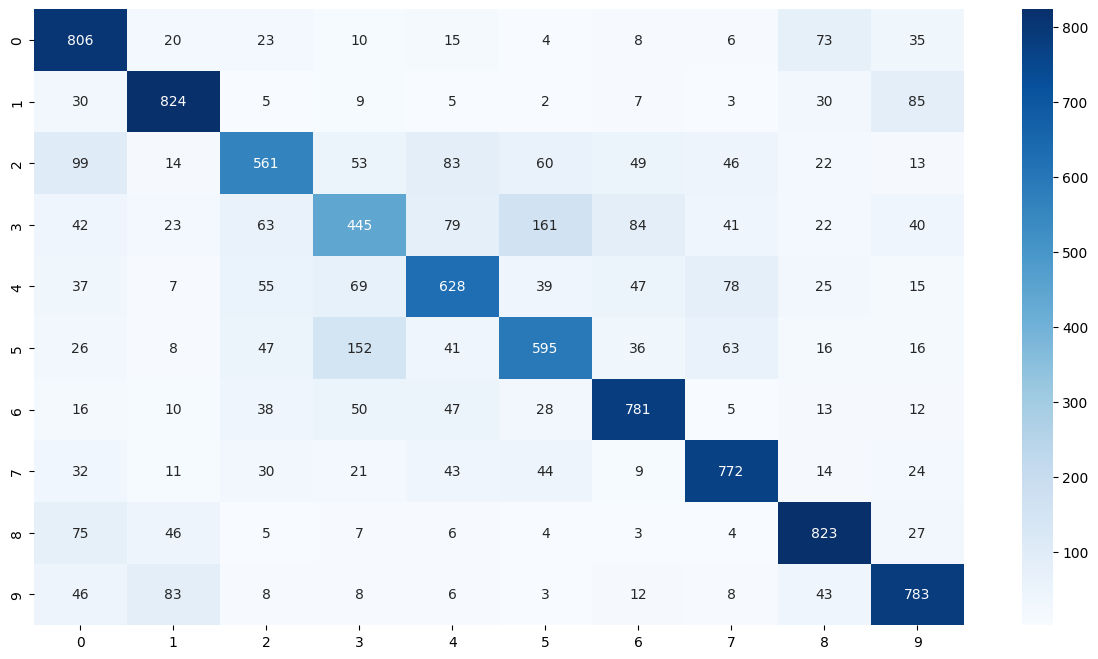

In [32]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(test_labels,predictions), cmap='Blues', annot=True, fmt='g');

## Testing Model (Predicting)

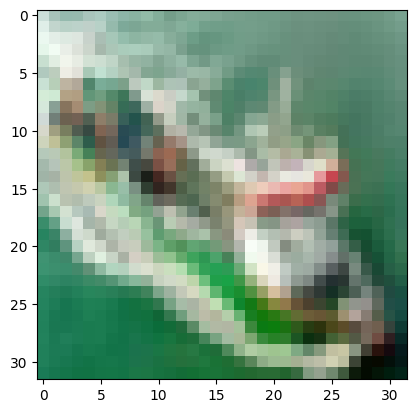

In [33]:
plt.imshow(test_images[15]);

In [34]:
test_labels[15][0]

8

In [35]:
class_names[8]

'ship'

In [36]:
test_images[15].shape

(32, 32, 3)

The input Tensor shape should be: (num_images, width, height, color_channels)

In [37]:
my_image = test_images[15]
my_image = my_image.reshape(1,32,32,3)
my_image.shape

(1, 32, 32, 3)

In [38]:
img_pred = np.argmax(model.predict(my_image))
class_names[img_pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


'ship'

In [39]:
img_pred

8

In [40]:
pred_prob = model.predict(my_image)[0][img_pred]
pred_prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


0.9516578

In [41]:
def img_pred(img, size=4):
    label = test_labels[img][0]
    my_image = test_images[img]
    plt.figure(figsize=(size,size))
    plt.imshow(my_image)
    my_image = my_image.reshape(1,32,32,3)
    img_pred = np.argmax(model.predict(my_image))
    pred_label = class_names[img_pred]
    pred_prob = model.predict(my_image)[0][img_pred]
    print(" Label {} <=> Pred: {} with prob {:.2}".format(
        class_names[label],
        pred_label,
        pred_prob))
    plt.grid(False)
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
 Label cat <=> Pred: cat with prob 0.77


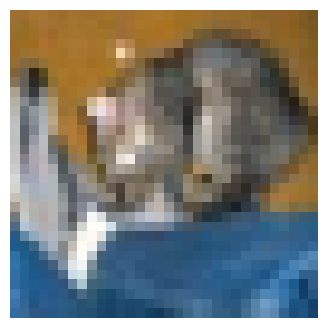

In [42]:
img_pred(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
 Label cat <=> Pred: cat with prob 0.77


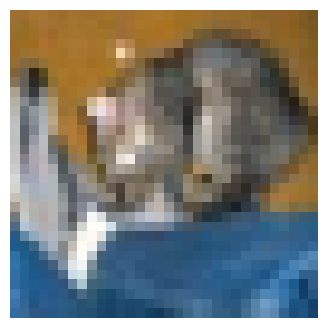

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
 Label ship <=> Pred: ship with prob 0.97


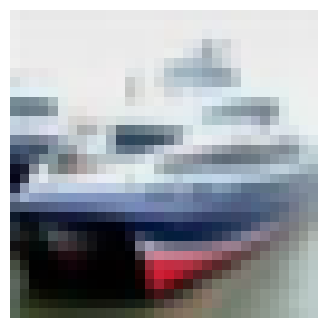

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
 Label ship <=> Pred: ship with prob 0.85


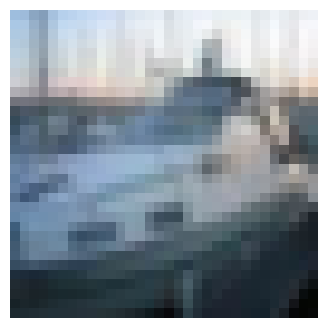

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
 Label airplane <=> Pred: airplane with prob 0.97


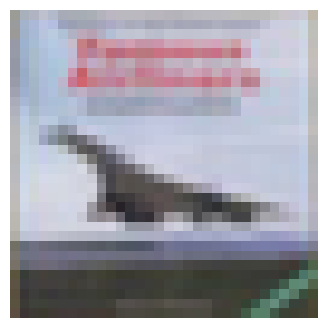

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
 Label frog <=> Pred: deer with prob 0.55


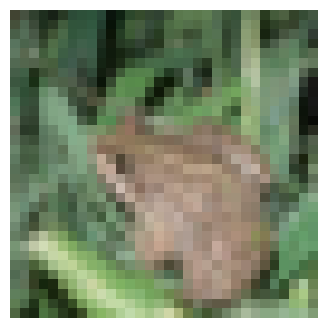

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
 Label frog <=> Pred: frog with prob 0.98


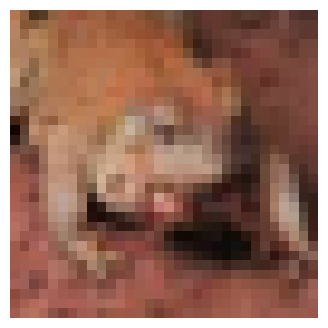

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
 Label automobile <=> Pred: automobile with prob 0.78


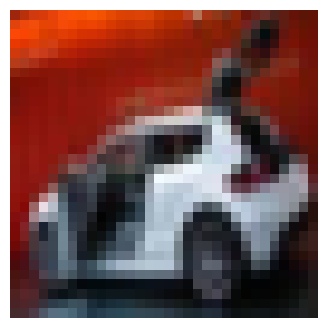

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
 Label frog <=> Pred: frog with prob 0.51


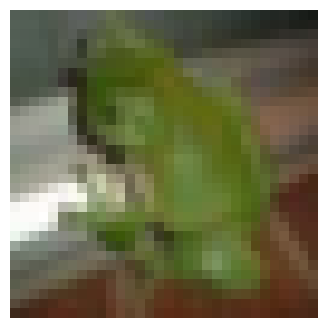

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
 Label cat <=> Pred: cat with prob 0.5


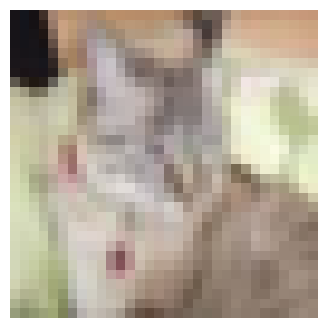

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
 Label automobile <=> Pred: automobile with prob 0.98


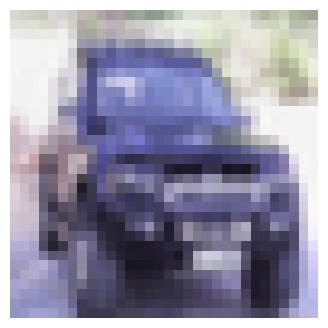

In [43]:
for i in range (10):
  img_pred(i)

## Saving the model

In [44]:
!pwd # Linux command, shows where we are in CoLab's folders

/content


In [46]:
model.save('cifar_10_model.keras')

Use [Netron](https://netron.app) to visualize the model, hyperparameters, tensor shapes, etc. Netron is a viewer for neural network, deep learning and machine learning models (See [GitHub](https://github.com/lutzroeder/netron) for instructions about instalation in your desktop).

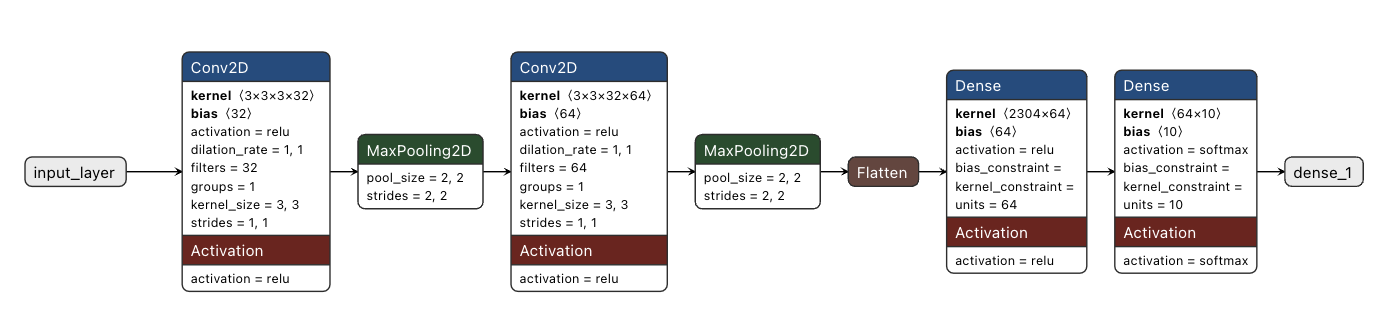

# Converting to TensorFlow Lite

You can convert the TF trained model using:  `TFLiteConverter.from_keras_model(model)`

In [47]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

Alternativally, is possible to convert the model from a saved model: `tf.lite.TFLiteConverter.from_saved_model(model_cifar10)` or from a Keras saved model: `tf.lite.TFLiteConverter.from_keras_model(model_cifar10.h5)`

In [ ]:
# model_path = '/content/cifar_10_model'
# model_cifar10 = tf.keras.models.load_model(model_path)
# converter = tf.lite.TFLiteConverter.from_saved_model(model_cifar10)
# converter = tf.lite.TFLiteConverter.from_keras_model(model_cifar10)

In [48]:
tflite_model = converter.convert()

Saved artifact at '/tmp/tmp8ghb2tva'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132555830307552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132555830625376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132554329482592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132554329484880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132554329999664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132554330002480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132554330003008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132554330006528: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [49]:
# Save .tflite model
open("/content/cifar10.tflite","wb").write(tflite_model)

673600

## Dynamic range quantization
The simplest form of post-training quantization statically quantizes only the weights from floating point to integer, which has 8-bits of precision:

In [50]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

Saved artifact at '/tmp/tmpf4q58_ho'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132555830307552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132555830625376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132554329482592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132554329484880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132554329999664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132554330002480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132554330003008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132554330006528: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [51]:
# Save .tflite model
open("/content/cifar10_quant.tflite","wb").write(tflite_quant_model)

177464

Use [Netron](https://netron.app) to visualize the quantized model. Pay attention that now the weights are int8.

## Uploading a saved TF model for convertion

If you'd like to upload your previous saved model in order to avoid re-train it:

1.   On the left of the UI click on the folder icon and go to sub-folder "content"
2.   Click on the three dots to the right of folder `content` file and select upload




In [ ]:
model_path = '/content/cifar_10_model.h5'
model_cifar10 = tf.keras.models.load_model(model_path)
converter = tf.lite.TFLiteConverter.from_keras_model(model_cifar10)

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpxr5tzuy1/assets


INFO:tensorflow:Assets written to: /tmp/tmpxr5tzuy1/assets


In [ ]:
# Save .tflite model
tflite_model_size = open("/content/cifar10_quant_model.tflite","wb").write(tflite_quant_model)
print("Quantized model (DEFAULT) is {:,} bytes".format(tflite_model_size))

Quantized model (DEFAULT) is 177,232 bytes


## Testing TFLite Model

In [ ]:
interpreter = tf.lite.Interpreter("/content/cifar10_quant_model.tflite")

In [ ]:
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
input_details

[{'dtype': numpy.float32,
  'index': 0,
  'name': 'conv2d_input',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([ 1, 32, 32,  3], dtype=int32),
  'shape_signature': array([-1, 32, 32,  3], dtype=int32),
  'sparsity_parameters': {}}]

In [ ]:
output_details

[{'dtype': numpy.float32,
  'index': 17,
  'name': 'Identity',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([ 1, 10], dtype=int32),
  'shape_signature': array([-1, 10], dtype=int32),
  'sparsity_parameters': {}}]

In [ ]:
def set_input_tensor(interpreter, image):
    tensor_index = interpreter.get_input_details()[0]['index']
    input_tensor = interpreter.tensor(tensor_index)()[0]
    input_tensor[:, :] = image

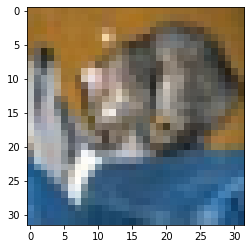

In [ ]:
image = test_images[0]
plt.imshow(image);

In [ ]:
set_input_tensor(interpreter, image)
interpreter.invoke()
output_details = interpreter.get_output_details()[0]

In [ ]:
interpreter.get_tensor(output_details['index'])

array([[1.7630339e-03, 5.6266632e-05, 3.1530831e-04, 9.3056065e-01,
        8.8554447e-07, 4.1046296e-03, 3.9717399e-02, 4.3506748e-08,
        2.3398938e-02, 8.2843471e-05]], dtype=float32)

In [ ]:
np.squeeze(interpreter.get_tensor(output_details['index']))

array([1.7630339e-03, 5.6266632e-05, 3.1530831e-04, 9.3056065e-01,
       8.8554447e-07, 4.1046296e-03, 3.9717399e-02, 4.3506748e-08,
       2.3398938e-02, 8.2843471e-05], dtype=float32)

In [ ]:
output = np.squeeze(interpreter.get_tensor(output_details['index']))
output

array([1.7630339e-03, 5.6266632e-05, 3.1530831e-04, 9.3056065e-01,
       8.8554447e-07, 4.1046296e-03, 3.9717399e-02, 4.3506748e-08,
       2.3398938e-02, 8.2843471e-05], dtype=float32)

In [ ]:
img_pred = np.argmax(output)
class_names[img_pred]

'cat'

In [ ]:
img_pred

3

In [ ]:
output[img_pred]

0.93056065

In [ ]:
def classify_image(image):
    set_input_tensor(interpreter, image)
    interpreter.invoke()
    output_details = interpreter.get_output_details()[0]
    output = np.squeeze(interpreter.get_tensor(output_details['index']))
    img_pred = np.argmax(output)
    pred_label = class_names[img_pred]
    pred_prob = output[img_pred]
    plt.imshow(image)
    print(" Pred: {} with prob {:.2}".format(
        pred_label,
        pred_prob))
    plt.grid(False)
    plt.axis('off')
    plt.show()

 Pred: cat with prob 0.93


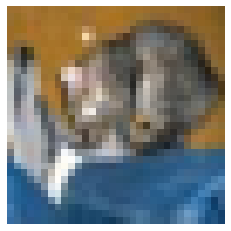

In [ ]:
classify_image(test_images[0])

 Pred: cat with prob 0.93


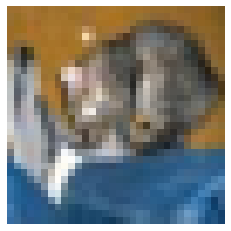

 Pred: ship with prob 0.99


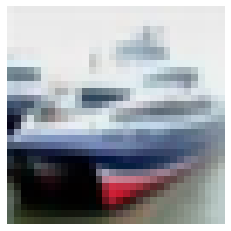

 Pred: automobile with prob 0.91


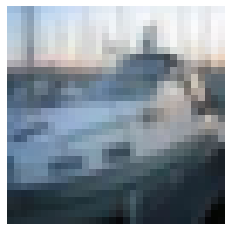

 Pred: airplane with prob 1.0


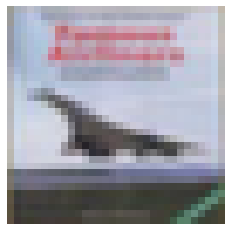

 Pred: deer with prob 0.82


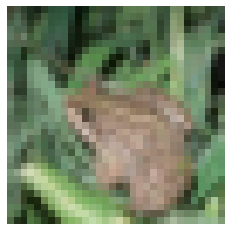

 Pred: frog with prob 0.99


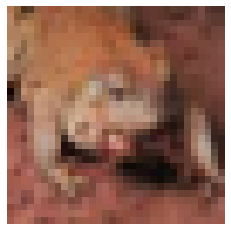

 Pred: automobile with prob 0.99


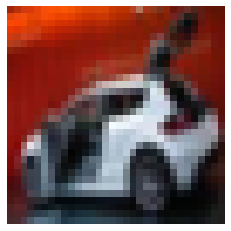

 Pred: bird with prob 0.54


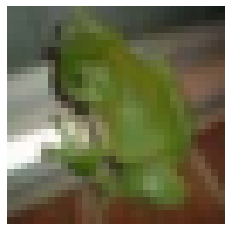

 Pred: cat with prob 0.71


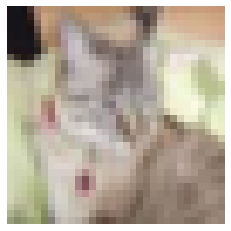

 Pred: automobile with prob 1.0


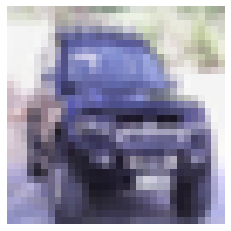

In [ ]:
for i in range (10):
  classify_image(test_images[i])

# TensorFlow Lite Micro

In [ ]:
import tensorflow as tf

In [ ]:
model_path = '/content/cifar_10_model.h5'
model_cifar10 = tf.keras.models.load_model(model_path)
converter = tf.lite.TFLiteConverter.from_keras_model(model_cifar10)

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpbuw3hft9/assets


In [ ]:
# Save .tflite model
tflite_model_size = open("/content/cifar10_quant_model.tflite","wb").write(tflite_quant_model)
print("Quantized model (DEFAULT) is {:,} bytes".format(tflite_model_size))

Quantized model (DEFAULT) is 177,232 bytes


### Generate a TensorFlow Lite for Microcontrollers Model
To convert the TensorFlow Lite quantized model into a C source file that can be loaded by TensorFlow Lite for Microcontrollers on MCUs, we simply need to use the ```xxd``` tool to convert the ```.tflite``` file into a ```.cc``` file.

**Convert to a C array**

First install xxd

In [ ]:
!apt-get update && apt-get -qq install xxd

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [69.5 kB]
Hit:12 http://ppa.launchpad.net/cran/

Now, convert and save the .cc converted model

In [ ]:
MODEL_TFLITE = 'cifar10_quant_model.tflite'
MODEL_TFLITE_MICRO = 'cifar10_quant_model.cc'
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}
REPLACE_TEXT = MODEL_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_TFLITE_MICRO}

If you'd like to download your model for safekeeping:
1. On the left of the UI click on the folder icon
2. Click on the three dots to the right of the ```cifar10_quant_model.cc``` file and select download

In [ ]:
!cat {MODEL_TFLITE_MICRO}

Streaming output truncated to the last 5000 lines.
  0x02, 0x15, 0x01, 0xd1, 0x02, 0xe9, 0xee, 0x07, 0x2d, 0x18, 0xfe, 0x01,
  0x1c, 0xfa, 0x03, 0xf6, 0x0c, 0xf2, 0xed, 0xed, 0x06, 0xf2, 0xfa, 0xda,
  0x0f, 0xf1, 0x06, 0x0e, 0xee, 0xf8, 0x01, 0x0e, 0x07, 0x03, 0xf7, 0x30,
  0xf7, 0xfa, 0xf7, 0x0a, 0x09, 0xff, 0x12, 0x02, 0xfb, 0x01, 0x14, 0xf8,
  0x07, 0xd8, 0xfd, 0x0b, 0x01, 0x1e, 0xc3, 0x10, 0x20, 0x2c, 0x0f, 0xf1,
  0x04, 0x10, 0x05, 0x2a, 0xd9, 0xf3, 0x0a, 0x00, 0xfd, 0xe0, 0xda, 0x1a,
  0xfb, 0xea, 0xfd, 0xf5, 0x0a, 0x00, 0xff, 0xe8, 0xf3, 0xe4, 0x03, 0x15,
  0x04, 0x0d, 0xff, 0xdb, 0xd9, 0x06, 0x0b, 0xda, 0xdb, 0xf9, 0x00, 0x03,
  0x0b, 0x08, 0x03, 0x03, 0x25, 0xf9, 0xd5, 0x02, 0x0e, 0x0a, 0xf1, 0xf7,
  0x09, 0x0d, 0x0c, 0xb6, 0x12, 0x08, 0x02, 0xf8, 0x04, 0x02, 0x17, 0x10,
  0x0e, 0xdf, 0x01, 0xd0, 0xff, 0x00, 0xfd, 0x0f, 0x1c, 0x02, 0x17, 0x0a,
  0x05, 0xf0, 0xfb, 0xed, 0x21, 0xfe, 0xfd, 0xec, 0xdf, 0x04, 0x03, 0xf9,
  0x1a, 0xb7, 0x01, 0xdf, 0x12, 0x29, 0x03, 0xe6, 0xee, 0xf5,